Sabrina Araújo nUSP 12566182

Exercício 3: Transformações de intensidade

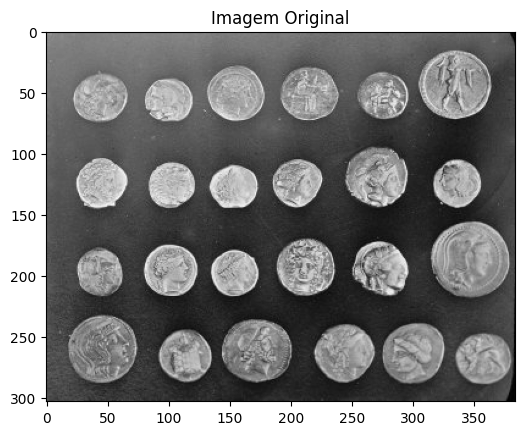

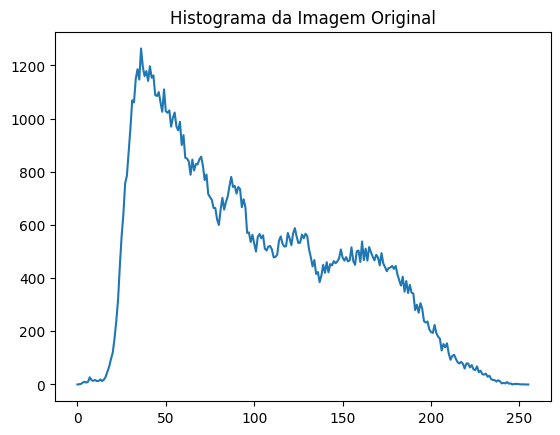

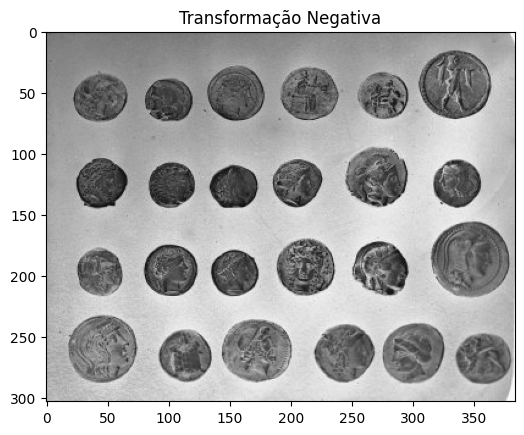

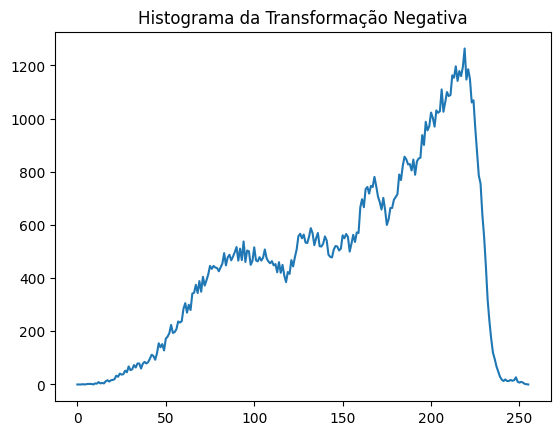

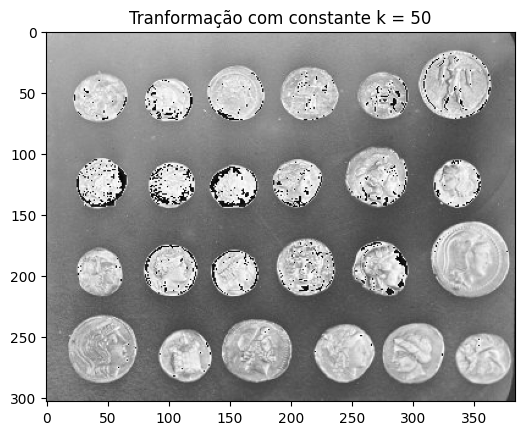

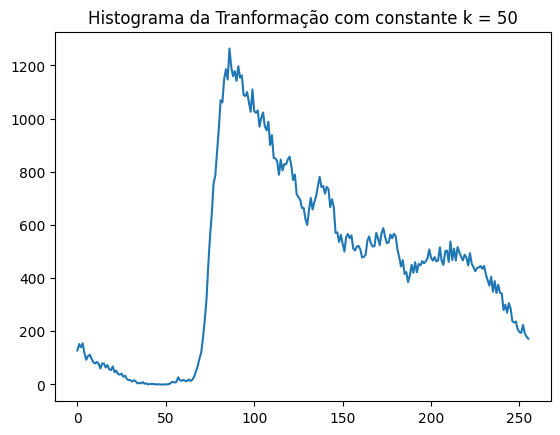

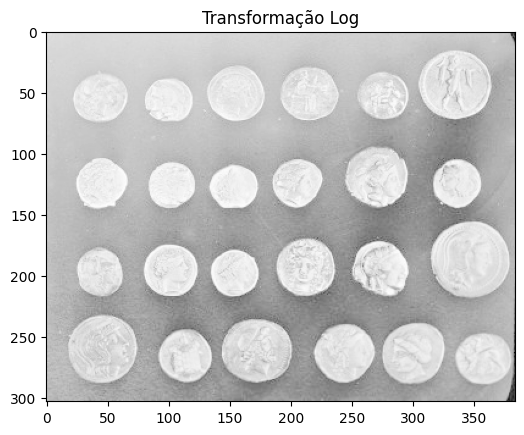

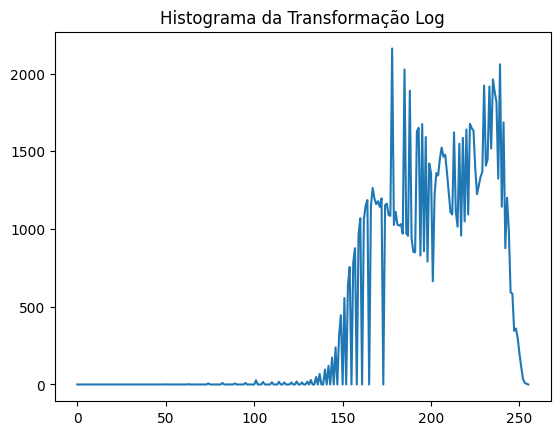

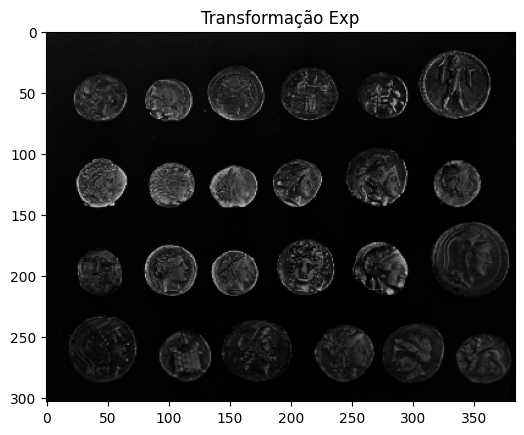

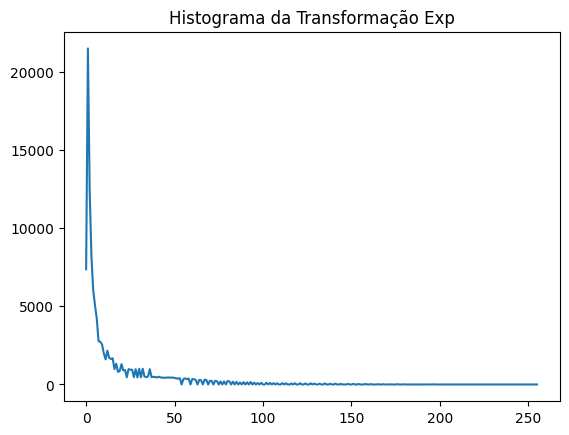

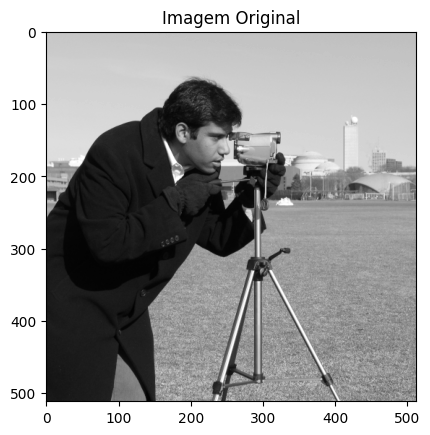

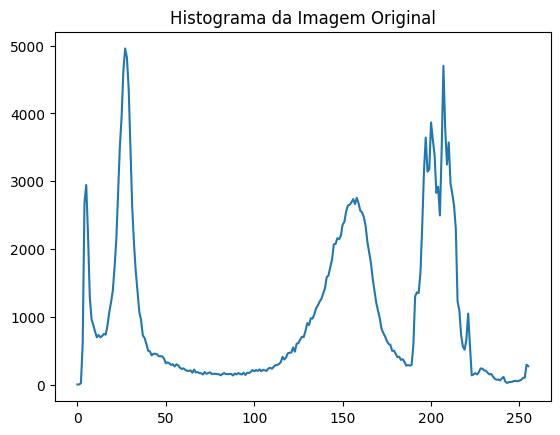

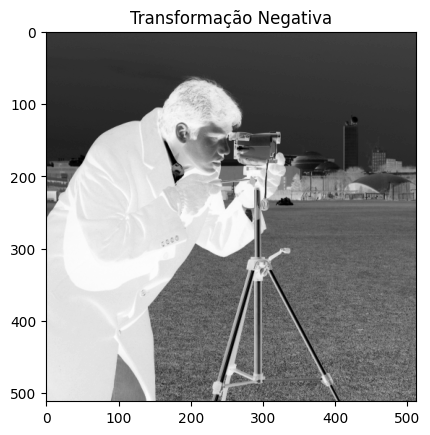

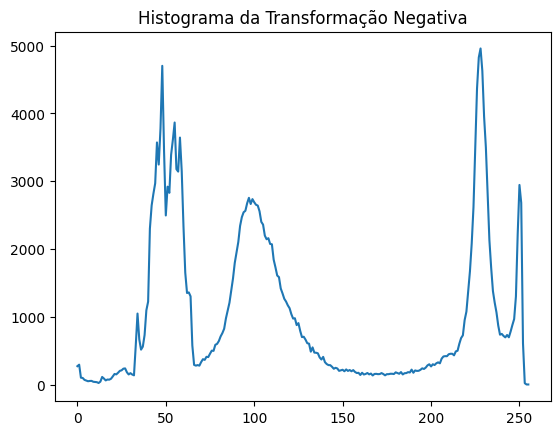

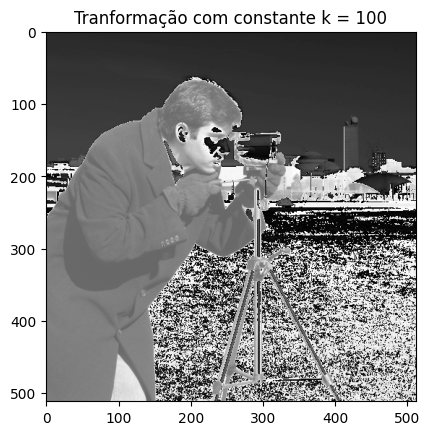

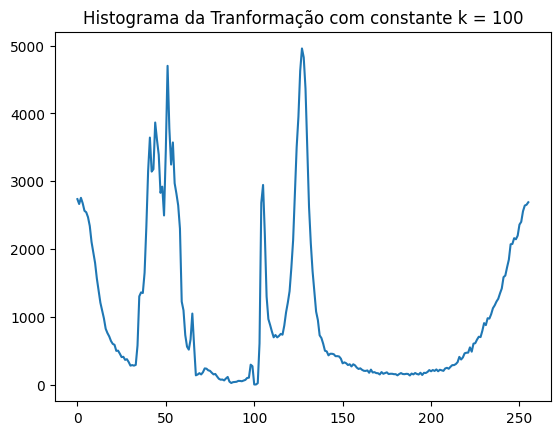

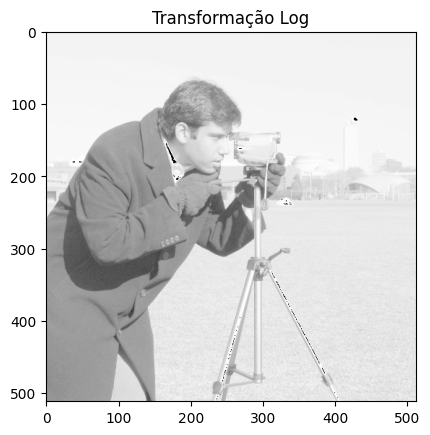

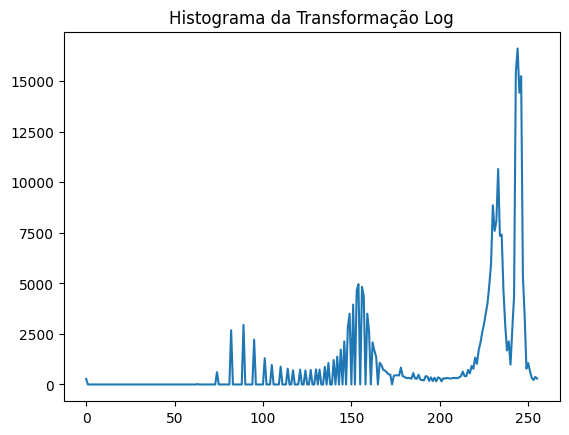

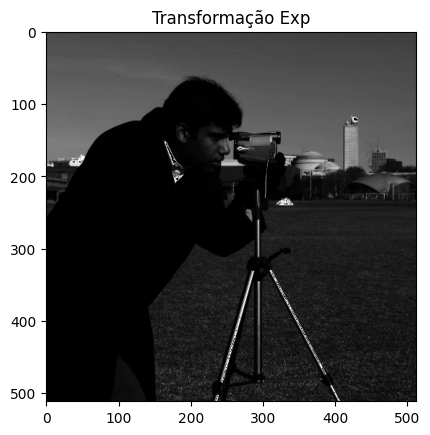

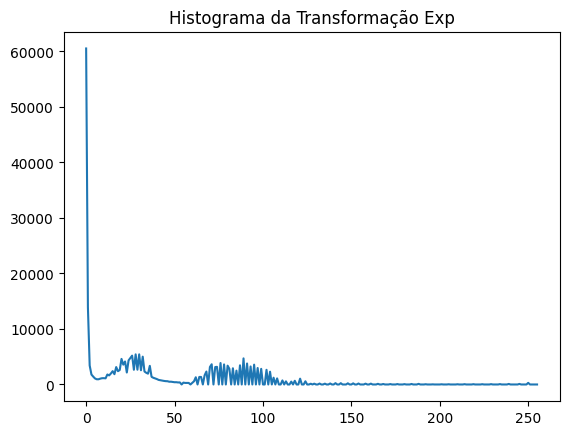

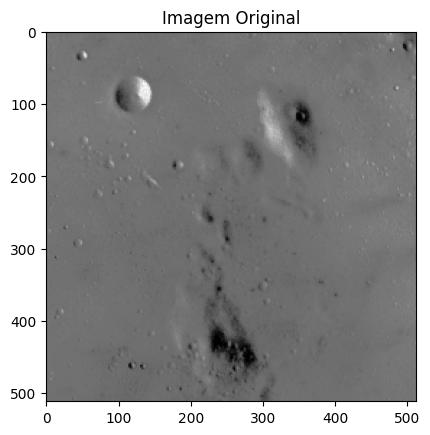

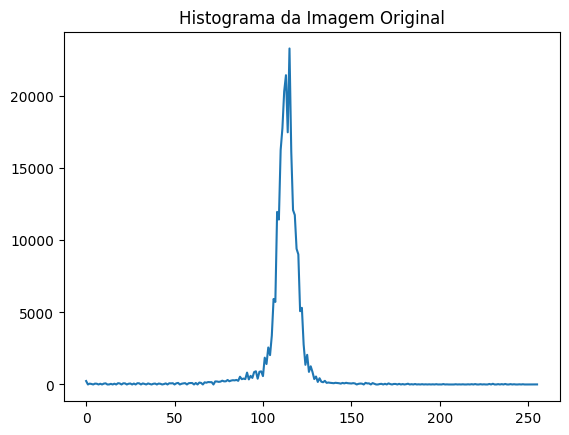

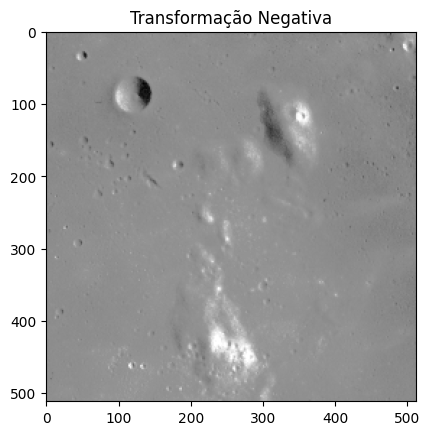

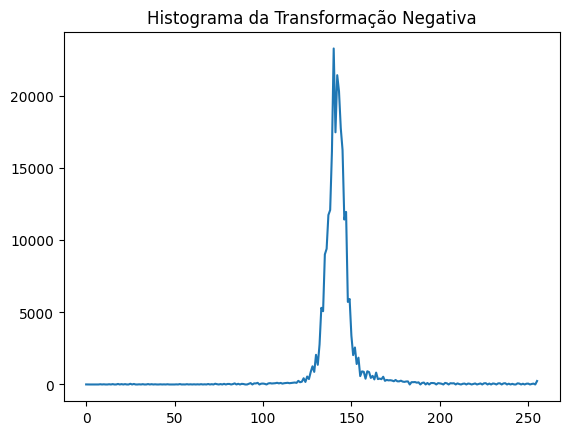

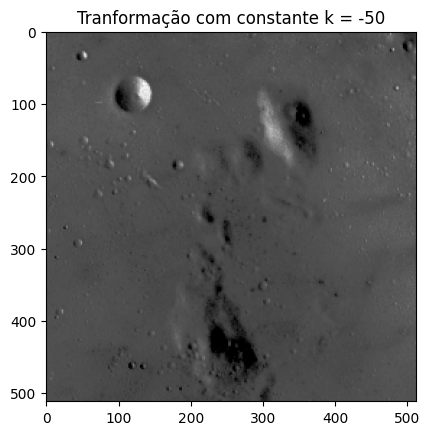

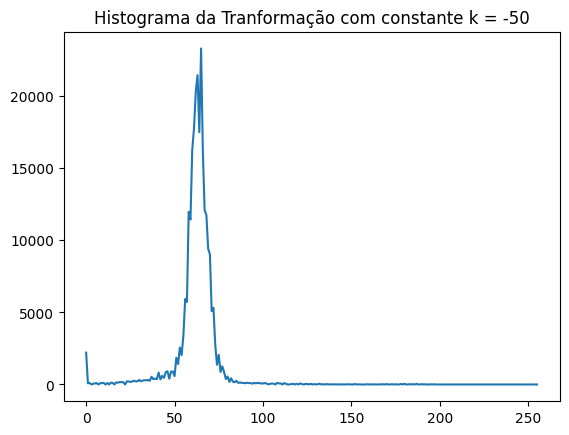

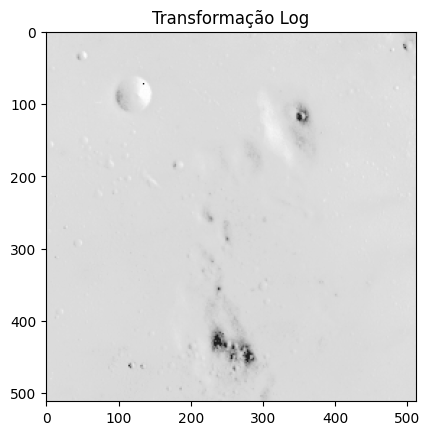

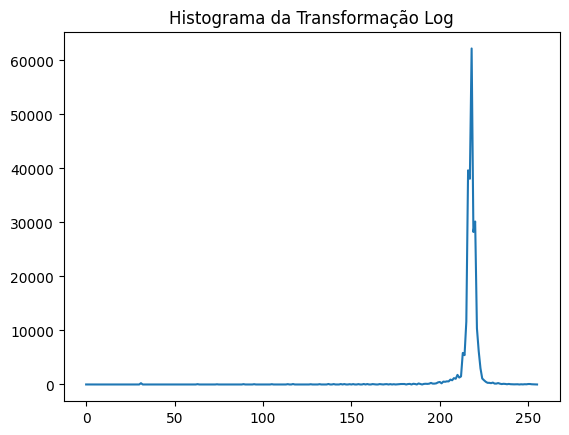

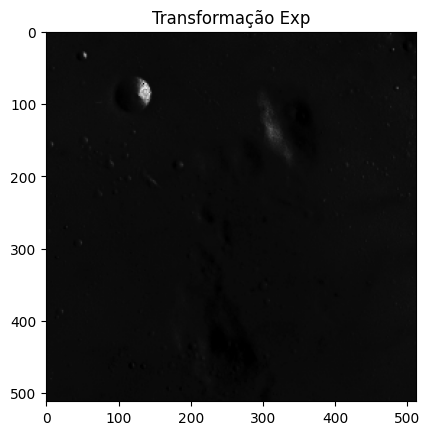

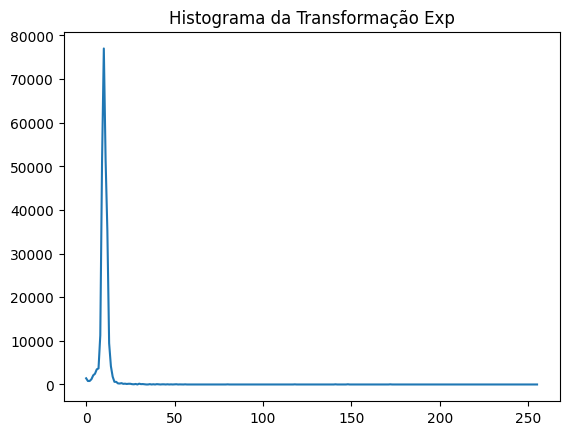

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
import cv2

def plot(imagem, descricao):
  plt.imshow(imagem, cmap='gray')
  plt.title(descricao)
  plt.show()

  histograma = cv2.calcHist([imagem], [0], None, [256], [0,256])
  plt.plot(histograma)
  plt.title(f"Histograma da {descricao}")
  plt.show()

def negativo(imagem):
  imgNeg = 255 - imagem
  imgNeg = np.clip(imgNeg, 0, 255).astype(np.uint8)
  plot(imgNeg, "Transformação Negativa")
  return

def constante(imagem, k):
  imgCnst = imagem + k
  imgCnst = np.clip(imgCnst, 0, 255).astype(np.uint8)
  plot(imgCnst, f"Tranformação com constante k = {k}")
  return

'''
s = T(r) = c*log(1+r)
c = 255/(log(1 + max_input_pixel_value))
'''
def log(imagem):
  c = 255 / np.log1p(1 + 255)
  imgLog = c * (np.log1p(imagem + 1))
  imgLog = np.array(imgLog, dtype = np.uint8)
  plot(imgLog, "Transformação Log")
  return

def exp(imagem):
  c = 255 / np.log1p(1 + 255)
  imgExp = np.exp(imagem**1/c) - 1
  imgExp = np.array(imgExp, dtype = np.uint8)
  plot(imgExp, "Transformação Exp")
  return

#imagem 1
imagem = data.coins()
imagem = img_as_ubyte(imagem)
plot(imagem, "Imagem Original")

negativo(imagem)
constante(imagem, 50)
log(imagem)
exp(imagem)

#imagem 2
imagem = data.camera()
imagem = img_as_ubyte(imagem)
plot(imagem, "Imagem Original")

negativo(imagem)
constante(imagem, 100)
log(imagem)
exp(imagem)

#imagem 3
imagem = data.moon()
imagem = img_as_ubyte(imagem)
plot(imagem, "Imagem Original")

negativo(imagem)
constante(imagem, -50)
log(imagem)
exp(imagem)